In [10]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش اول:
<p></p>
<font size=4>
ابتدا داده ها را می خوانیم 
و آنهارا به تصاویر یک کاناله تبدیل میکنیم

True

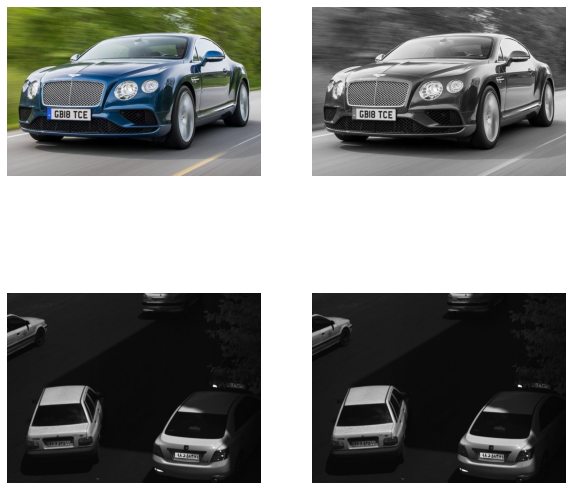

In [11]:
fig, ax = plt.subplots(2,2 , figsize =(10,10))
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)

img1_gray = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2 , cv2.COLOR_BGR2GRAY)

plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.subplot(2, 2,2)
plt.imshow(img1_gray, cmap='gray')
plt.axis('off')
cv2.imwrite('1_gray.jpg',img1_gray)

plt.subplot(2, 2, 3)
plt.imshow(img2)
plt.axis('off')
plt.subplot(2, 2,4)
plt.imshow(img2_gray, cmap='gray')
plt.axis('off')
cv2.imwrite('2_gray.jpg',img2_gray)



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش دوم:
<p></p>
<font size=4>
سپس بر روی تصاویر فیلتر با سایز های مختلف اعمال میکنیم، مشاهده میشود که هر چه سایز کرنل ما بزرگتر باشد تاثیر فیلتر بر روی تصویر بیشتر است

3
5
7


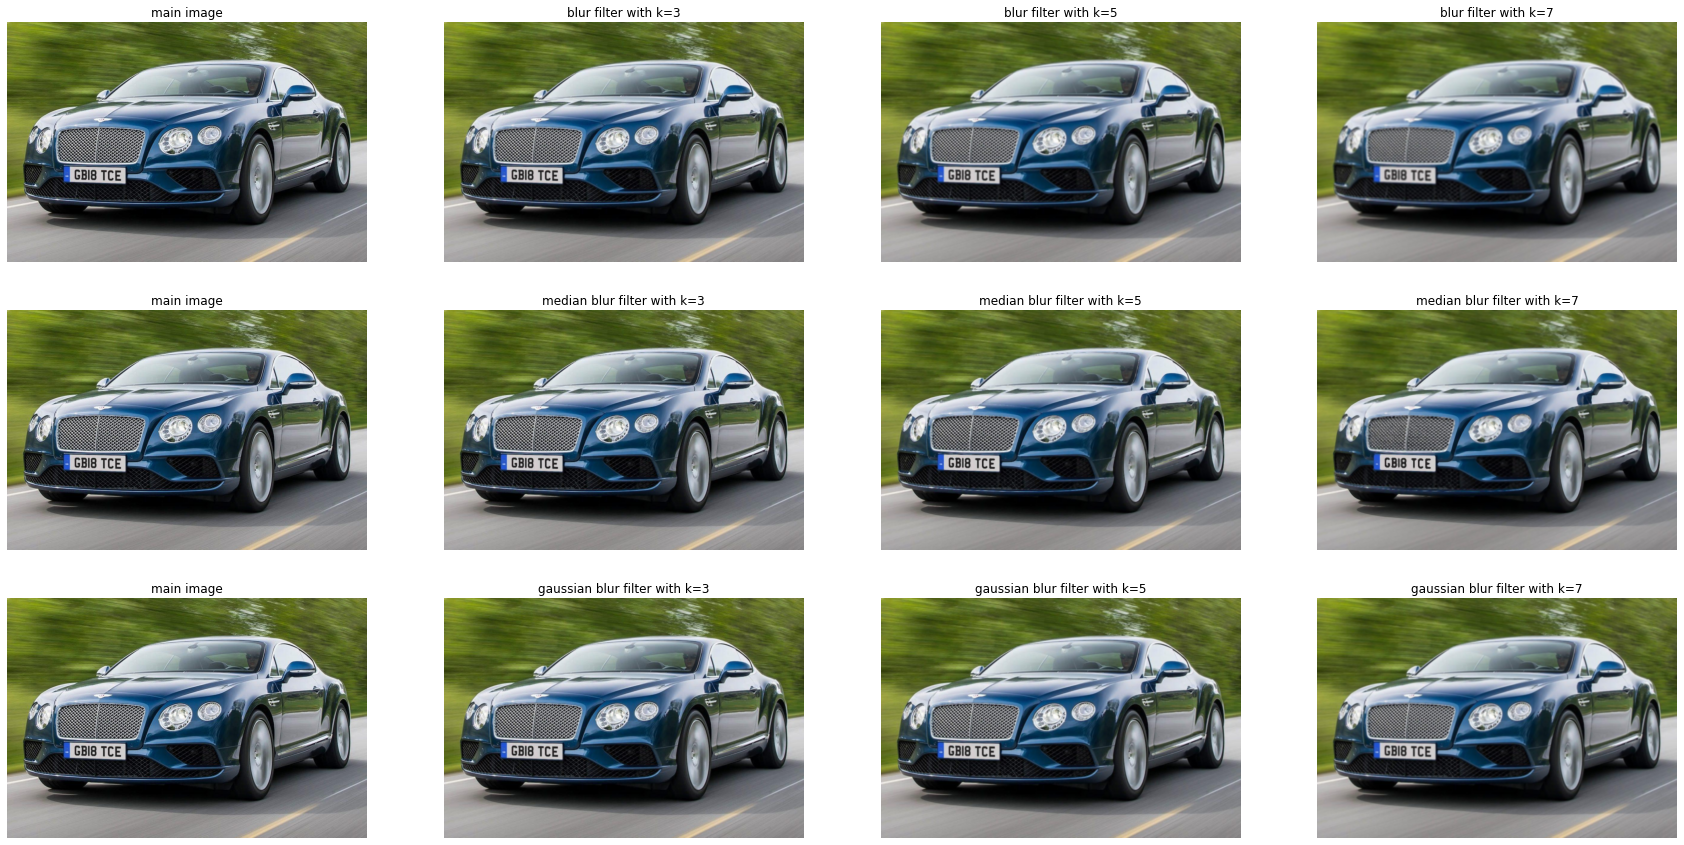

In [12]:
fig, ax = plt.subplots(3,4 , figsize =(30,15))

plt.subplot(3,4,1)
plt.imshow(img1)
plt.axis('off')
plt.title('main image')
plt.subplot(3,4,5)
plt.imshow(img1)
plt.title('main image')
plt.axis('off')
plt.subplot(3,4,9)
plt.imshow(img1)
plt.title('main image')
plt.axis('off')
for i,k in enumerate([3, 5, 7]):
    img1_blur = cv2.blur(img1, (k,k))
    plt.subplot(3,4,2+i)
    plt.imshow(img1_blur)
    plt.axis('off')
    plt.title(f'blur filter with k={k}')

    img1_median = cv2.medianBlur(img1 ,k)
    plt.subplot(3,4,2+i+4)
    plt.imshow(img1_median)
    plt.axis('off')
    plt.title(f'median blur filter with k={k}')

    
    img1_gaussian = cv2.GaussianBlur(img1, (k,k), 0)
    plt.subplot(3,4,2+i+8)
    plt.imshow(img1_gaussian)
    plt.axis('off')
    plt.title(f'gaussian blur filter with k={k}')

    print(k)

3
5
7


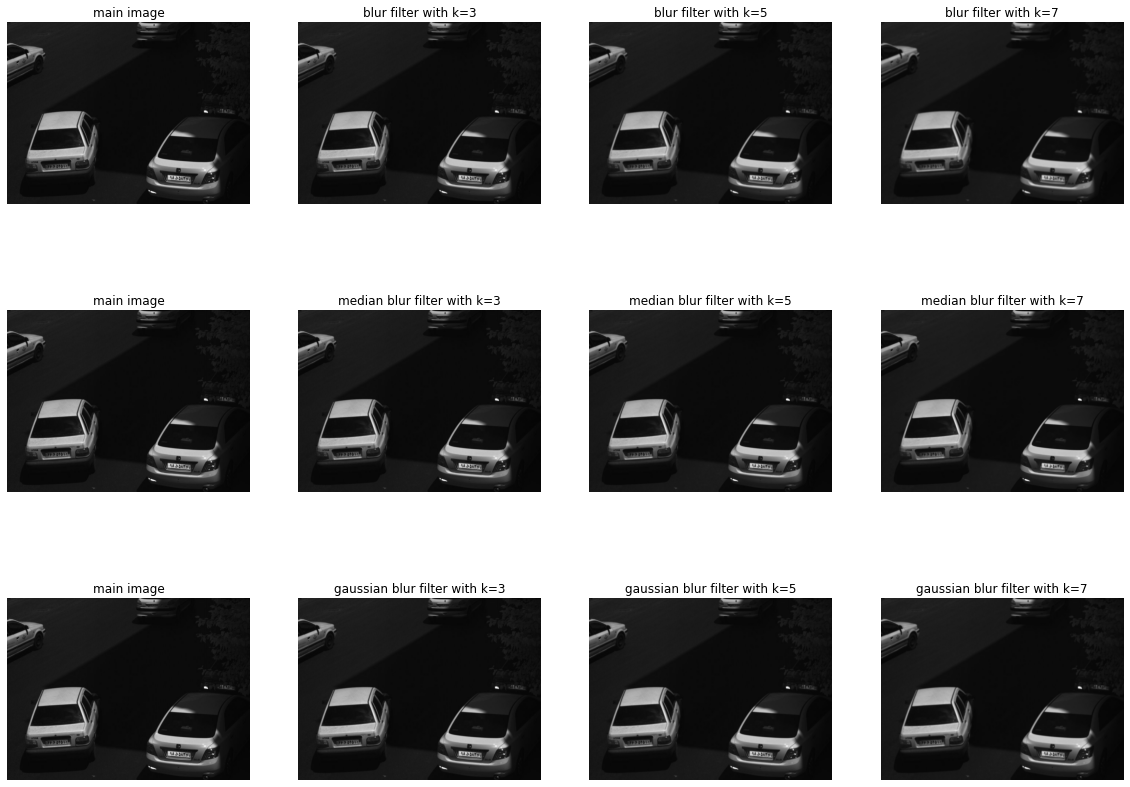

In [13]:
fig, ax = plt.subplots(3,4 , figsize =(20,15))
plt.subplot(3,4,1)
plt.imshow(img2)
plt.axis('off')
plt.title('main image')
plt.subplot(3,4,5)
plt.imshow(img2)
plt.title('main image')
plt.axis('off')
plt.subplot(3,4,9)
plt.imshow(img2)
plt.title('main image')
plt.axis('off')
for i,k in enumerate([3, 5, 7]):
    img2_blur = cv2.blur(img2, (k,k))
    plt.subplot(3,4,2+i)
    plt.imshow(img2_blur)
    plt.axis('off')
    plt.title(f'blur filter with k={k}')

    img2_median = cv2.medianBlur(img2 ,k)
    plt.subplot(3,4,2+i+4)
    plt.imshow(img2_median)
    plt.axis('off')
    plt.title(f'median blur filter with k={k}')

    
    img2_gaussian = cv2.GaussianBlur(img2, (k,k), 0)
    plt.subplot(3,4,2+i+8)
    plt.imshow(img2_gaussian)
    plt.axis('off')
    plt.title(f'gaussian blur filter with k={k}')

    print(k)


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش دوم:
<p></p>
<font size=4>
سپس دو فیلتر مطرح شده در صورت سوال را پیاده سازی میکنیم که نتایج آن برای دو تصویر به صورت زیر است

(-0.5, 1199.5, 799.5, -0.5)

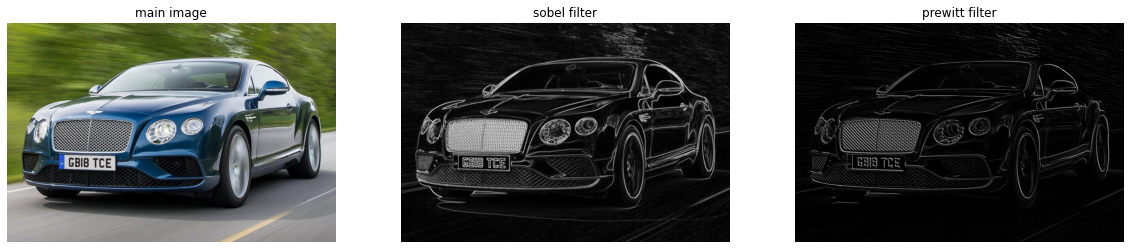

In [14]:
fig, ax = plt.subplots(1,3 , figsize =(20,15))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.title('main image')
plt.axis('off')

img1_gaussian = cv2.GaussianBlur(img1, (3,3), 0)
img1_gaussian_gray = cv2.cvtColor(img1_gaussian , cv2.COLOR_BGR2GRAY)
img1_grad_x = cv2.Sobel(img1_gaussian_gray, cv2.CV_16S, 1, 0, ksize=3)
img1_grad_y = cv2.Sobel(img1_gaussian_gray, cv2.CV_16S, 0, 1, ksize=3)
img1_abs_grad_x = cv2.convertScaleAbs(img1_grad_x)
img1_abs_grad_y = cv2.convertScaleAbs(img1_grad_y)    
img1_grad_sobel = cv2.addWeighted(img1_abs_grad_x, 0.5, img1_abs_grad_y, 0.5, 0)
plt.subplot(1,3,2)
plt.imshow(img1_grad_sobel,cmap='gray')
plt.title('sobel filter')
plt.axis('off')



kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img1_grad_x = cv2.filter2D(img1_gaussian_gray, -1, kernelx)
img1_grad_y = cv2.filter2D(img1_gaussian_gray, -1, kernely)
img1_abs_grad_x = cv2.convertScaleAbs(img1_grad_x)
img1_abs_grad_y = cv2.convertScaleAbs(img1_grad_y)
img1_grad_prewitt = cv2.addWeighted(img1_abs_grad_x, 0.5, img1_abs_grad_y, 0.5, 0)
plt.subplot(1,3,3)
plt.imshow(img1_grad_prewitt,cmap='gray')
plt.title('prewitt filter')
plt.axis('off')


(-0.5, 1279.5, 959.5, -0.5)

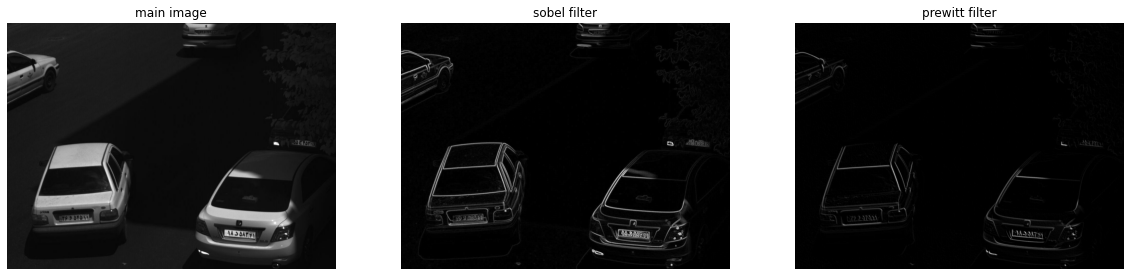

In [15]:
fig, ax = plt.subplots(1,3 , figsize =(20,15))
plt.subplot(1,3,1)
plt.imshow(img2)
plt.title('main image')
plt.axis('off')

img2_gaussian = cv2.GaussianBlur(img2, (3,3), 0)
img2_gaussian_gray = cv2.cvtColor(img2_gaussian , cv2.COLOR_BGR2GRAY)
img2_grad_x = cv2.Sobel(img2_gaussian_gray, cv2.CV_16S, 1, 0, ksize=3)
img2_grad_y = cv2.Sobel(img2_gaussian_gray, cv2.CV_16S, 0, 1, ksize=3)
img2_abs_grad_x = cv2.convertScaleAbs(img2_grad_x)
img2_abs_grad_y = cv2.convertScaleAbs(img2_grad_y)    
img2_grad_sobel = cv2.addWeighted(img2_abs_grad_x, 0.5, img2_abs_grad_y, 0.5, 0)
plt.subplot(1,3,2)
plt.imshow(img2_grad_sobel,cmap='gray')
plt.title('sobel filter')
plt.axis('off')

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img2_grad_x = cv2.filter2D(img2_gaussian_gray, -1, kernelx)
img2_grad_y = cv2.filter2D(img2_gaussian_gray, -1, kernely)
img2_abs_grad_x = cv2.convertScaleAbs(img2_grad_x)
img2_abs_grad_y = cv2.convertScaleAbs(img2_grad_y)
img2_grad_prewitt = cv2.addWeighted(img2_abs_grad_x, 0.5, img2_abs_grad_y, 0.5, 0)
plt.subplot(1,3,3)
plt.imshow(img2_grad_prewitt,cmap='gray')
plt.title('prewitt filter')
plt.axis('off')



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش سوم:
<p></p>
<font size=4>
در این مرحله فیلتر کنی را با کران های بالا و پایین مختلف بر روی تصویر اعمال میکنیم که کران های آن در بالای تصویر قید شده ست،لازم به ذکر است در مشاهدات ما نویز این فیلتر نسبت به بخش های قبل بیشتر است و با بالا بردن کران ها این نویز کمتر میگردد.

(-0.5, 1199.5, 799.5, -0.5)

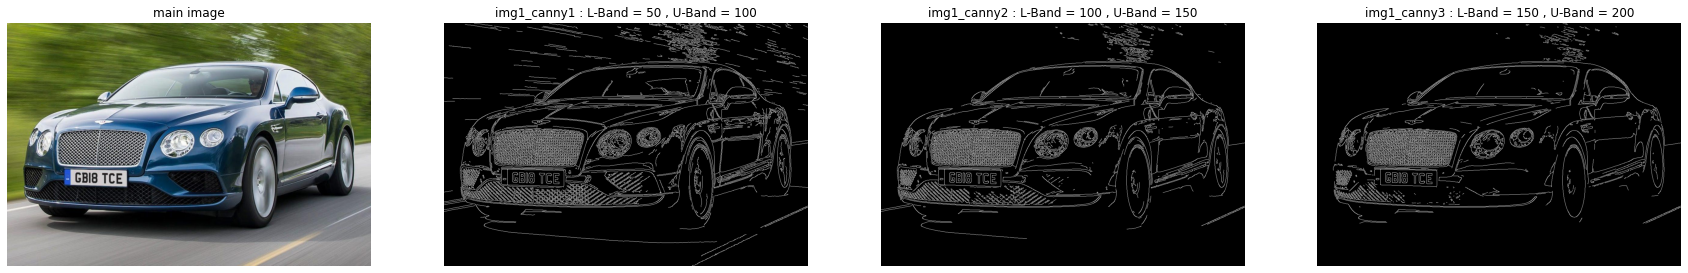

In [16]:
fig, ax = plt.subplots(1,4 , figsize =(30,20))
plt.subplot(1,4,1)
plt.imshow(img1)
plt.title('main image')
plt.axis('off')
img1_gaussian = cv2.GaussianBlur(img1, (3,3), 0)
img1_gaussian_gray = cv2.cvtColor(img1_gaussian , cv2.COLOR_BGR2GRAY)

img1_canny1 = cv2.Canny(img1_gaussian_gray, 50, 100 )
plt.subplot(1,4,2)
plt.imshow(img1_canny1, cmap='gray')
plt.title('img1_canny1 : L-Band = 50 , U-Band = 100')
plt.axis('off')

img1_canny2 = cv2.Canny(img1_gaussian_gray, 100, 150 )
plt.subplot(1,4,3)
plt.imshow(img1_canny2, cmap='gray')
plt.title('img1_canny2 : L-Band = 100 , U-Band = 150')
plt.axis('off')

img1_canny3 = cv2.Canny(img1_gaussian_gray, 150, 200 )
plt.subplot(1,4,4)
plt.imshow(img1_canny3, cmap='gray')
plt.title('img1_canny3 : L-Band = 150 , U-Band = 200')
plt.axis('off')


(-0.5, 1279.5, 959.5, -0.5)

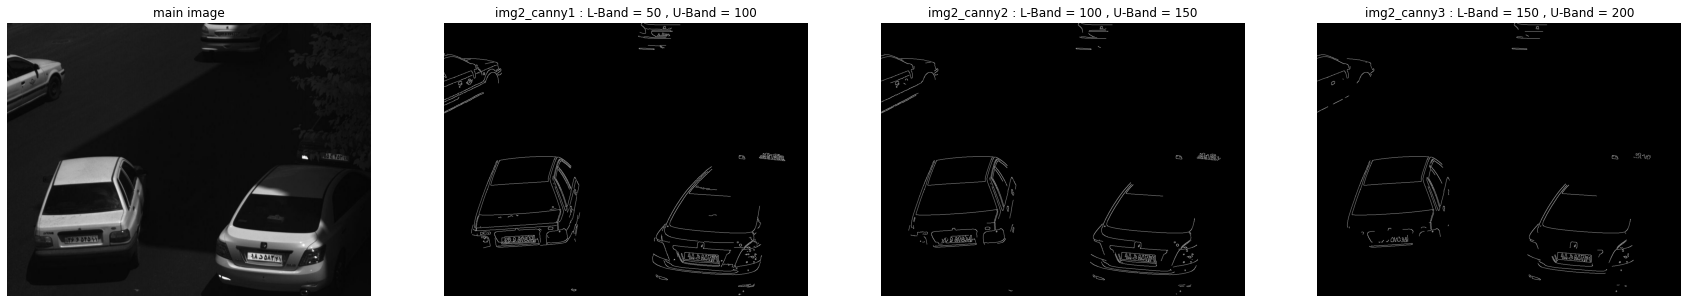

In [17]:
fig, ax = plt.subplots(1,4 , figsize =(30,20))
plt.subplot(1,4,1)
plt.imshow(img2)
plt.title('main image')
plt.axis('off')

img2_gaussian = cv2.GaussianBlur(img2, (3,3), 0)
img2_gaussian_gray = cv2.cvtColor(img2_gaussian , cv2.COLOR_BGR2GRAY)
img2_canny1 = cv2.Canny(img2_gaussian_gray, 50, 100 )
plt.subplot(1,4,2)
plt.imshow(img2_canny1, cmap='gray')
plt.title('img2_canny1 : L-Band = 50 , U-Band = 100')
plt.axis('off')

img2_canny2 = cv2.Canny(img2_gaussian_gray, 100, 150 )
plt.subplot(1,4,3)
plt.imshow(img2_canny2, cmap='gray')
plt.title('img2_canny2 : L-Band = 100 , U-Band = 150')
plt.axis('off')

img2_canny3 = cv2.Canny(img2_gaussian_gray, 150, 200 )
plt.subplot(1,4,4)
plt.imshow(img2_canny3, cmap='gray')
plt.title('img2_canny3 : L-Band = 150 , U-Band = 200')
plt.axis('off')



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش چهارم:
<p></p>
<font size=4>
  
   در این بخش مطابق دستور کار عمل کردیم، برای اعمال فیلتر های دایلیشن و اروژن با تغییر سایز کرنل و تعداد دفعات استفاده از آن به صورت تجربی و مشاهده خروجی، به نتایج زیر دست یافتیم 

In [19]:
background = cv2.imread('background2.jpg')

record = cv2.VideoCapture('record2.mp4')
l = int(record.get(cv2.CAP_PROP_FRAME_COUNT))
w  = int(record.get(cv2.CAP_PROP_FRAME_WIDTH))   
h = int(record.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps =int(record.get(cv2.CAP_PROP_FPS)) 
#print(fps)
i = 0
#print(l)
out = cv2.VideoWriter('result.mp4', cv2.VideoWriter_fourcc(*'XVID'), fps, (w,h))

while True:
    ret, frame = record.read()
    if not ret:
        break
    #plt.plot
    #plt.imshow(frame)
    i+=1
    #print(i)
    sub = frame - background
    sub_gray =  cv2.cvtColor(sub , cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(sub_gray, 150, 255, cv2.THRESH_BINARY)
    kernel = np.ones((7,7), np.uint8)
    mask = cv2.erode(mask, kernel)
    mask = cv2.dilate(mask, kernel)
    kernel = np.ones((51,51), np.uint8)
    mask = cv2.dilate(mask, kernel)
    mask = cv2.dilate(mask, kernel)
    kernel = np.ones((51,51), np.uint8)
    mask = cv2.erode(mask, kernel)
    kernel = np.ones((31,31), np.uint8)

    mask = cv2.erode(mask, kernel)

    final_mask  = cv2.merge((mask,mask,mask))
    new_frame = np.bitwise_and(frame, final_mask)
    out.write(new_frame)
    cv2.imwrite('framei.jpg',new_frame)
    #cv2.imshow('res',new_frame)

#cv2.waitKey(0)
#cv2.destroyAllWindows()
out.release()
record.release()
cv2.destroyAllWindows()
